## Sea Level Predictor 

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import stats
import seaborn as sns

In [39]:
path = "C:/Users/milen/Desktop/Python_freecode/esl.csv"

In [40]:
df = pd.read_csv(path).rename(columns = {
                            "Year": "year", 
                             "CSIRO Adjusted Sea Level": "sea",
})

In [41]:
df

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


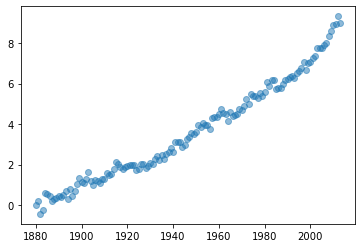

In [42]:
plt.scatter(x = df['year'], y = df['sea'], alpha = 0.5)
plt.show()

In [75]:
x =df['year']
y= df['sea']

In [77]:
mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r, p, se = linregress(x[mask],y[mask])

In [78]:
slope

0.06304458401213482

In [79]:
intercept

-119.06594196773983

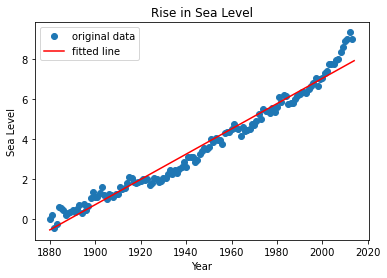

In [121]:
plt.plot(x, y , 'o', label = 'original data')
plt.plot(x, intercept + slope*x, 'r', label = 'fitted line')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Rise in Sea Level')
plt.show()

In [57]:
l = linregress(x[mask],y[mask])
x2 = np.arange(x[mask].min(), 2050, 1)
y2 = x2*l.slope+ l.intercept

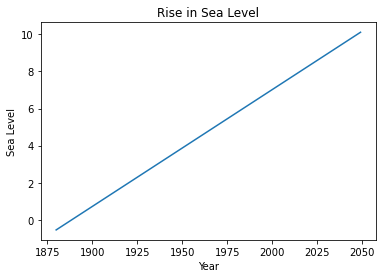

In [122]:
plt.plot(x2,y2)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Rise in Sea Level')
plt.show()

In [72]:
x_2000 = df[df['year']>= 2000]

In [101]:
x_2000_x = df['year']

In [107]:
mask2 = ~np.isnan(x_2000_x) & ~np.isnan(y)
slope, intercept, r, p, se = linregress(x_2000_x[mask2],y[mask2])

In [114]:
l2 = linregress(x_2000_x[mask2], y[mask2])

In [115]:
x3 = np.arange(2000, 2050, 1)

In [116]:
y3 = x3 * l2.slope + l2.intercept

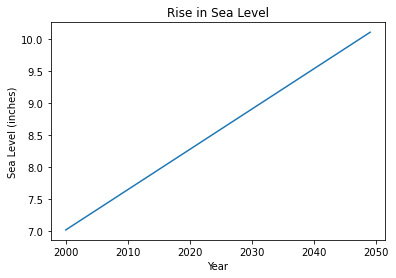

In [120]:
plt.plot(x3, y3)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.savefig('sea_level_plot.png')